In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [33]:
proj = pd.read_csv("EMOAEventData.csv")
proj

,Trial,Stimulus,Participant,Fixation Count,Fixation Duration Total [ms],Saccade Count,Saccade Duration Total [ms],Saccade Amplitude Total [°],Blink Count,Scanpath Length [px]
0,Trial001,MCQ1,STUD-P01,33,15894369,38,819.4,35.9,3,4930
1,Trial001,MCQ1,STUD-P02,45,16776943,45,898.9,41.2,0,7115
2,Trial001,MCQ1,STUD-P03,41,11943779,38,1016.3,92.2,12,9773
3,Trial001,MCQ1,STUD-P04,55,22215175,50,1382.2,103.5,1,13116
4,Trial001,MCQ1,STUD-P05,24,10629981,24,566.0,44.2,2,3662
...,...,...,...,...,...,...,...,...,...,...
70,Trial005,MCQ5,STUD-P11,29,10745558,29,784.0,61.2,2,4785
71,Trial005,MCQ5,STUD-P12,26,8912917,26,499.6,30.0,0,4493
72,Trial005,MCQ5,STUD-P13,54,12260893,59,2382.3,189.1,6,10216
73,Trial005,MCQ5,STUD-P14,38,9097022,46,3314.8,513.5,4,9320


In [34]:
y = proj['Scanpath Length [px]']


proj.loc[proj['Stimulus']=="MCQ1","Stimulus"]=1 #encoding the feature stimulus
proj.loc[proj['Stimulus']=="MCQ2","Stimulus"]=2
proj.loc[proj['Stimulus']=="MCQ3","Stimulus"]=3
proj.loc[proj['Stimulus']=="MCQ4","Stimulus"]=4
proj.loc[proj['Stimulus']=="MCQ5","Stimulus"]=5

# Convert the 'Stimulus' column to numeric type
proj['Stimulus'] = proj['Stimulus'].astype(int)
X = proj[["Stimulus"]]
# X = pd.get_dummies(X)
X

,Stimulus
0,1
1,1
2,1
3,1
4,1
...,...
70,5
71,5
72,5
73,5


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  #data spltting
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)                #applying linear regression and finding evaluation matrics for testing data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²) score: {r2}")



Mean Squared Error (MSE): 8682258.344041388
Root Mean Squared Error (RMSE): 2946.5672135624854
Mean Absolute Percentage Error (MAPE): 26.153960502010893%
R-squared (R²) score: 0.39799521517761416


In [59]:

def print_metrics(y_true, y_pred, data_type='Data'):
    """
    Calculates and prints evaluation metrics for the given data can be both training and testing ata

    """
    mse = mean_squared_error(y_true, y_pred)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)  # R-squared score
    
    
    print(f"Mean Squared Error (MSE) for {data_type} data: {mse}")
    print(f"Root Mean Squared Error (RMSE) for {data_type} data: {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE) for {data_type} data: {mape}%")
    print(f"R-squared (R²) score for {data_type} data: {r2}")


# Print evaluation metrics for training data
print_metrics(y_train, y_train_pred, 'Training')

# Print evaluation metrics for testing data
print_metrics(y_test, y_pred, 'Testing')




Mean Squared Error (MSE) for Training data: 2759309.60105083
Root Mean Squared Error (RMSE) for Training data: 1661.1169739217132
Mean Absolute Percentage Error (MAPE) for Training data: 17.186491798519707%
R-squared (R²) score for Training data: 0.7670755407769752
Mean Squared Error (MSE) for Testing data: 8682258.344041388
Root Mean Squared Error (RMSE) for Testing data: 2946.5672135624854
Mean Absolute Percentage Error (MAPE) for Testing data: 26.153960502010893%
R-squared (R²) score for Testing data: 0.39799521517761416


In [55]:
y = proj['Scanpath Length [px]']  # Target variable
X = proj.drop(["Trial", "Scanpath Length [px]", "Participant"], axis=1)  # eliminating the output ad categorical features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
reg = LinearRegression().fit(X_train, y_train)  # Train the model
y_train_pred = reg.predict(X_train)  # Predict on training set
y_pred = reg.predict(X_test)  # Predict on test set

# Calculating evaluation metrics for teting data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE) for testing data: {mse}")
print(f"Root Mean Squared Error (RMSE) for testing data: {rmse}")
print(f"Mean Absolute Percentage Error (MAPE) for testing data: {mape}%")
print(f"R-squared (R²) score for testing data: {r2}")
# evaluation metrics for trainig data
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error (MSE) for trainig data: {mse}")
print(f"Root Mean Squared Error (RMSE) for trainig data: {rmse}")
print(f"Mean Absolute Percentage Error (MAPE) for trainig data: {mape}%")
print(f"R-squared (R²) score: {r2}")


Mean Squared Error (MSE) for testing data: 8682258.344041388
Root Mean Squared Error (RMSE) for testing data: 2946.5672135624854
Mean Absolute Percentage Error (MAPE) for testing data: 26.153960502010893%
R-squared (R²) score for testing data: 0.39799521517761416
Mean Squared Error (MSE) for trainig data: 2759309.60105083
Root Mean Squared Error (RMSE) for trainig data: 1661.1169739217132
Mean Absolute Percentage Error (MAPE) for trainig data: 17.186491798519707%
R-squared (R²) score: 0.7670755407769752


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0,n_init="auto").fit(X_train)
print(kmeans.labels_)   # Print the cluster labels for each data point
kmeans.cluster_centers_   # plotting the coordinates of the cluster centers

In [47]:
def evaluate_kmeans(X_train, n_clusters, random_state=42):
    # Train the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X_train)
    
    # Get the cluster labels
    labels = kmeans.labels_
    
    # Calculate evaluation metrics
    silhouette = silhouette_score(X_train, labels)
    calinski_harabasz = calinski_harabasz_score(X_train, labels)
    davies_bouldin = davies_bouldin_score(X_train, labels)
    
    # Print the results
    print(f"Silhouette Score : {silhouette}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz}")
    print(f"Davies-Bouldin Score: {davies_bouldin}")

# Example usage
evaluate_kmeans(X_train, n_clusters=2, random_state=42)

Silhouette Score : 0.6282960445026916
Calinski-Harabasz Score: 116.25773381492512
Davies-Bouldin Score: 0.5808874937861195


In [48]:
evaluate_kmeans(X_train, n_clusters=5, random_state=42)

Silhouette Score : 0.5746880235884301
Calinski-Harabasz Score: 274.3831046981132
Davies-Bouldin Score: 0.5028913318725456


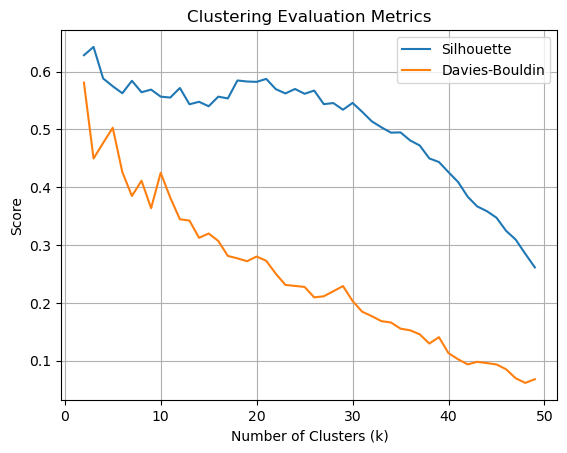

In [50]:

def evaluate_kmeans_range(X_train, start=2, end=50, random_state=42):
    # Lists to store the evaluation metrics and cluster counts
    s_list = []  
    c_list = []  
    d_list = []  
    cluster_count = []  
    distortion = []  # Inertia (distortion)

    
    for i in range(start, end): # iterate to try different  number of clusters
        kmeans = KMeans(n_clusters=i, random_state=random_state).fit(X_train)
        
       
        cluster_count.append(i)
        
        
        s_list.append(silhouette_score(X_train, kmeans.labels_))
        
        
        c_list.append(calinski_harabasz_score(X_train, kmeans.labels_))
        
       
        d_list.append(davies_bouldin_score(X_train, kmeans.labels_))
        
       
        distortion.append(kmeans.inertia_)
    
    # Plotting the metrics
    plt.title('Clustering Evaluation Metrics')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Score')
    
    # Ploting evaluation metrics 
    plt.plot(cluster_count, s_list, label='Silhouette')
    
   
    plt.plot(cluster_count, d_list, label='Davies-Bouldin')
    
 
    
    # Show grid and legend
    plt.grid()
    plt.legend()
    
   
    plt.show()


evaluate_kmeans_range(X_train, start=2, end=50, random_state=42)


Text(0, 0.5, 'Calinski')

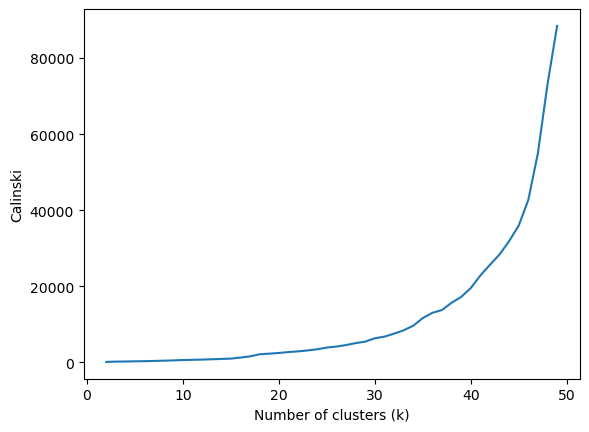

In [45]:
plt.plot(cluster_count, c_list, label = "Calinski")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski')

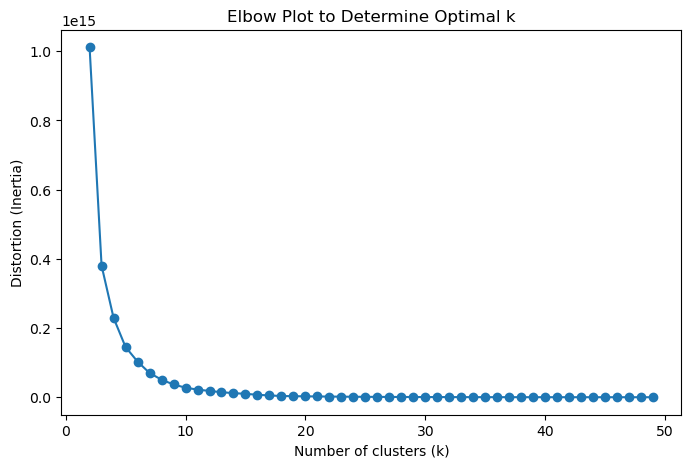

In [51]:


def plot_elbow_curve(cluster_count, distortion):
    """
    This code generates an Elbow Plot, which is used to determine the optimal number of clusters for KMeans clustering
    """
    plt.figure(figsize=(8, 5))  
    plt.plot(cluster_count, distortion, marker='o') 
    plt.xlabel('Number of clusters (k)')  # X-axis label
    plt.ylabel('Distortion (Inertia)')  # Y-axis label
    plt.title('Elbow Plot to Determine Optimal k')  # Plot title
    plt.grid(True)  #
    plt.show()  


plot_elbow_curve(cluster_count, distortion)
